In [89]:
library(tidyverse)
cleveland_data <- read_delim('Data/processed.cleveland.data', col_names = FALSE) |> as_tibble()
hungarian_data <- read_delim('Data/processed.hungarian.data', col_names = FALSE) |> as_tibble()
heart_data <- rbind(cleveland_data, hungarian_data) 
#reads the raw data and converts it into a tibble with no column names
colnames(heart_data) <- c('age', 'sex', 'chest_pain', 'trestbps', 'chol', 'fbs', 'restecg', 'max_hr', 
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num') 
#assigns names to the columns based on information from the website
heart_data <- mutate(heart_data, sex = as.factor(sex), chest_pain = as.factor(chest_pain), 
    num = replace(num, num > 0, 1), num = as.factor(num), fbs = as.factor(fbs), restecg = as.factor(restecg), 
    exang = as.factor(exang), thal = as.factor(thal), slope = as.factor(slope), ca = as.factor(ca)) |>
#converts all categorical attributes into factors
filter(chol != '?', trestbps != '?', fbs != '?') |>
#removes missing values from the cholesterol, resting blood pressure, fasting blood sugar and maximum 
#heart rate columns
mutate(chol = as.double(chol), trestbps = as.double(trestbps))
#converts all numerical attributes into doubles
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain,trestbps,chol,fbs,restecg,max_hr,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1


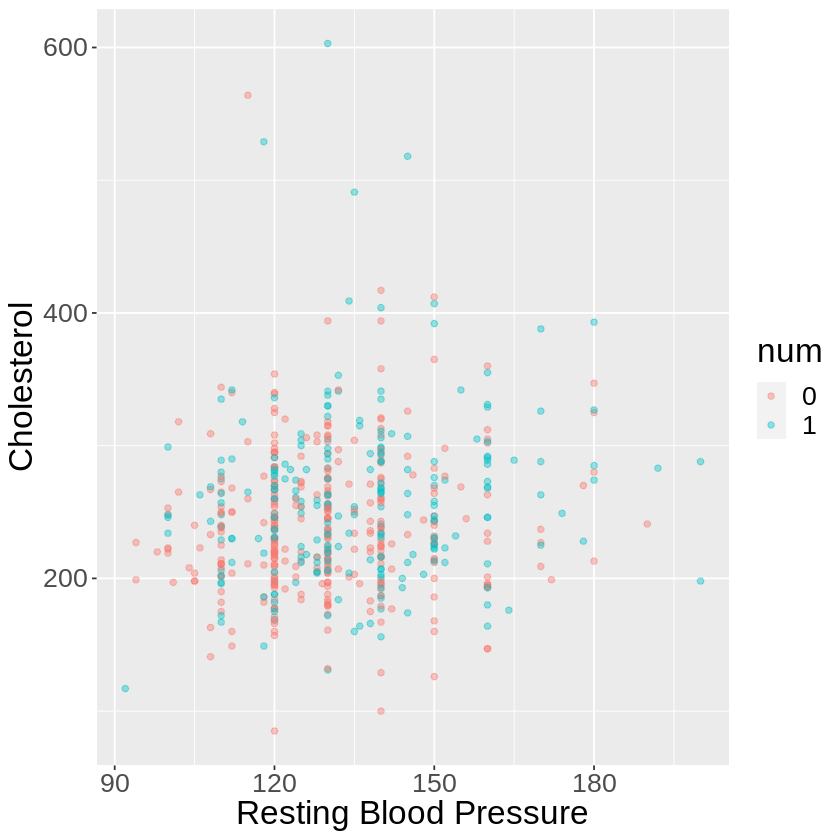

In [92]:
heart_plot_chol_bps <- heart_data |>
                ggplot(aes(x = trestbps, y = chol, color = num)) +
                geom_point(alpha = 0.4) +
                theme(text = element_text(size = 20)) +
                labs (x = 'Resting Blood Pressure', y = "Cholesterol")
heart_plot_chol_bps

Clearly based on the plot above, there is no relationship between cholesterol levels and resting blood pressure.